# Infinite Graphs

Sometimes you'll encounter infinite graphs.  For example, if webpages are nodes, and links are edges, the Internet is an infinite graph.  This is literal, as some pages may be generated on the fly (imagine a calendar: the Jan 2021 page may have a link to the Feb 2021 page, and so on forever).

We can use DFS or BFS to search for a path between two nodes in such a graph.  To avoid scenarios where an infinite series of nodes is explored before nearer children, we'll focus on BFS for this document.

Regular BFS searches until the todo queue is exhausted, but modifications that only search a fixed number of nodes or to a fixed depth may be appropriate for infinite graphs.

BFS has another use beyond finding paths: if the algorithm starts and we're only aware of one node (or a subset of nodes) in the graph, searching out from there can help us discover new nodes.  In the webpages example, maybe the algorithm knows only a single starting URL, but it can discover the URLs of other pages by following links.

Rather than use the Internet for the coding examples here, we'll have a made-up graph over which we'll search.  It is structured like this:

1. there are an infinite number of nodes, each corresponding to an integer
2. a node X0 (for example, 890) will have an edge to X2 (for example 892).  Furthermore, X1 will have an edge to X3, X2 will have an edge to X4, X3 will have an edge to X0, and X4 will have an edge to X1
3. a node X0 will also have an edge to (X+10)0

This graph is infinite, so we will not represent it using a Node class.  Instead, all we need to do BFS is a function that tells us the children of a given node (given the above description, the function will need to separate that first digit from the rest.  We can do that with the mod operator:

In [1]:
node = 123
prefix = node // 10
digit = node % 10
print(prefix)
print(digit)

12
3


The following function tells us the children for any given node number in our infinite graph.

In [2]:
def get_children(node):
    children = []
    prefix = node // 10
    digit = node % 10
    if digit < 5:
        children.append(prefix * 10 + (node + 2) % 5)
    if digit == 0:
        children.append(node + 10)
    return children

get_children(891)

[893]

In [3]:
get_children(670)

[672, 680]

We can now use `get_children` to start at a given node (say 1) and run BFS until we discover 30 nodes (or run out of nodes to explore).  We'll also have a graph dict that keeps track of the nodes and edges we discover.

In [4]:
from collections import deque

In [5]:
start_node = 1
todo = deque([start_node])
discovered = {start_node}
graph = {} # key: parent node, val: list of children

while len(todo) > 0 and len(discovered) < 30:
    node = todo.popleft()
    print("visit", node)
    children = get_children(node)
    graph[node] = children
    for child in children:
        if not child in discovered:
            todo.append(child)
            discovered.add(child)
            
print(sorted(discovered))

visit 1
visit 3
visit 0
visit 2
visit 10
visit 4
visit 12
visit 20
visit 14
visit 22
visit 30
visit 11
visit 24
visit 32
visit 40
visit 13
visit 21
visit 34
visit 42
visit 50
visit 23
visit 31
visit 44
visit 52
visit 60
[0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31, 32, 33, 34, 40, 41, 42, 44, 50, 52, 54, 60, 62, 70]


If we like, we can also use Graphviz to visualize the nodes and edges we found:

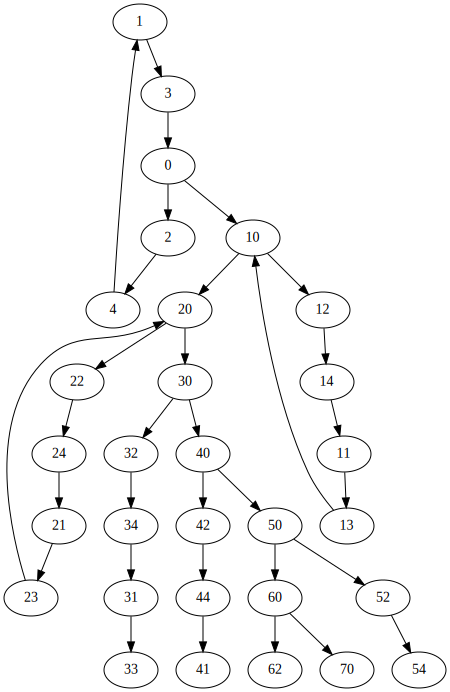

In [6]:
from graphviz import Digraph

g = Digraph()

for parent in graph:
    g.node(str(parent))
    for child in graph[parent]:
        g.edge(str(parent), str(child))
    
g

The above is of coures a finite subset of the nodes and edges in our graph.  If we wanted to, we could replace `< 30` with a much number larger to run the algorithm longer and discover new nodes.  The graph is infinite, after all!

# Conclusion

In this reading, we learned that the BFS algorithm doesn't need a complete graph represented by `Node` objects to work.  It just needs a way (such as a function or method) to tell us what children each node has.  Before, we just used BFS to search for paths between a pair of nodes, but in this more general form, we can use it to discover new nodes that we didn't know existed, just by exploring out from a starting node.  We also saw that BFS can work with an infinite graph, though it probably makes sense to bound how many nodes are searched, to avoid an infinite loop.